# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   > https://github.com/StemmedAxis06/M6006_assignment2_23360932014.git


3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [1]:
import pandas as pd 

the_summative_df = pd.read_csv('./attendance_anonymised-1.csv')

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


The first five rows of the dataset are as follows:

In [2]:
the_summative_df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


Now, let's get our description of the dataframe, mostly to see its structure and what types of values are in each column:

In [3]:
the_summative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

Mostly the obvious. Though, through observation, we can see some of columns (is positive and usage code) do have null values. 

Finally, using the describe feature, we can also get an initial statistical summary of our dataframe, including values like the mean, median, and various quarterly percentiles:

In [4]:
the_summative_df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


3. Drop the `Planned End Date` column.


In [5]:
the_summative_df = the_summative_df.drop(columns=['Planned End Date'])

the_summative_df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [6]:
# To complete this step, we shall use a dictionary and rename the columns through parsing the...
# rename command through said dictionary

# 1. Create the Dictionary
# NOTE: Some of the columns have the same requested name change and are thus not being included
# i.e. Surname -> Surname
rename_them_columns = {'Unit Instance Code' : 'Module Code', 
                       'Calocc Code' : 'Year', 
                       'Long Description' : 'Module Name',
                       'Register Event ID' : 'Event ID',
                       'Register Event Slot ID' : 'Event Slot ID', 
                       'Planned Start Date' : 'Date',
                       'is Positive' : 'Has Attended',
                       'Postive Marks' : 'Attended', # there was a spelling mistake here that killed me lol
                       'Negative Marks' : 'NotAttended',
                       'Usage Code' : 'Attendance Code'}

# Now, we use this dictionary as stated
the_summative_df = the_summative_df.rename(columns = rename_them_columns)

# And we check
the_summative_df

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [7]:
# This is a pretty simple command function. 
the_summative_df['Date'] = pd.to_datetime(the_summative_df['Date'])

the_summative_df

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


Nice.

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [8]:
# First, we need some imports
import matplotlib.pyplot as plt

# The next thing we need to do is see which modules we can actually pick.
# We shall do this in the form of an array
what_in_the_module = the_summative_df['Module Name'].unique()

# We also need to convert attendance into a numeric column
the_summative_df['Has Attended'] = (the_summative_df['Has Attended'] == 'Y').astype(int)

what_in_the_module



array(['Nursing', 'Italian', 'History', 'Arabic', 'Database Design',
       'Spanish', 'Journalism', 'International Business',
       'Project Management', 'Algorithms', 'System Administration',
       'Public Speaking', 'Cloud Computing', 'English Literature',
       'Cybersecurity', 'Discrete Mathematics', 'Linguistics', 'French',
       'Music Theory', 'Religious Studies', 'Marketing',
       'User Experience Design', 'Theater', 'Biology', 'Statistics',
       'Nutrition', 'Chemistry', 'Linear Algebra', 'Leadership',
       'Biomedical Engineering', 'Digital Systems', 'Political Science',
       'Arts & Crafts', 'Occupational Therapy', 'Quality Assurance',
       'Ethics', 'Creative Writing', 'Information Technology',
       'Graphic Design', 'Data Science', 'Web Development', 'Japanese',
       'Data Analysis', 'Epidemiology', 'Geography', 'Medicine',
       'Strategic Planning', 'Pharmacy', 'Business Intelligence',
       'Demographics'], dtype=object)

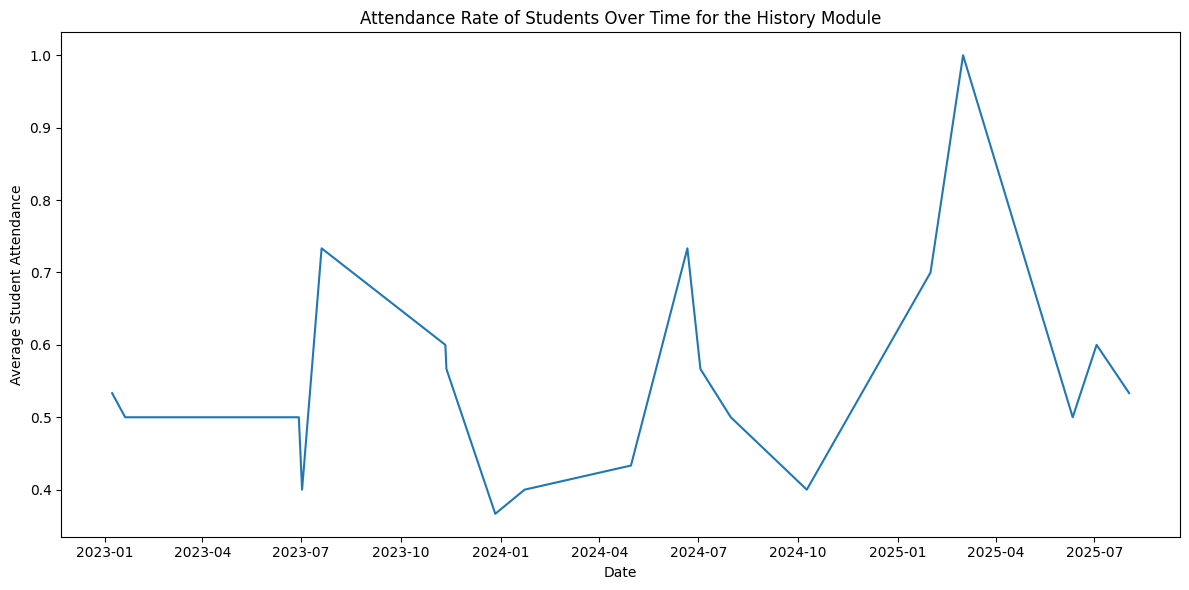

In [9]:
# I like the look of History. Call it personal preference 

# So, let's first filter for History as a value in the Module Name column
the_history_of_dataframes = the_summative_df[the_summative_df['Module Name'] == 'History']

# Now, all we need to do is group the dataframe by unique dates (so individual days), and gather what
# the attendance was for each of those date values
attendance_in_history = the_history_of_dataframes.groupby('Date')['Has Attended'].mean().reset_index()
# Note that we use the reset_index command in order to be able to access the 'Date' more easily

# Now, we plot it
plt.figure(figsize=(12,6))
plt.plot(attendance_in_history['Date'], attendance_in_history['Has Attended'])
plt.title('Attendance Rate of Students Over Time for the History Module')
plt.xlabel('Date')
plt.ylabel('Average Student Attendance')
plt.tight_layout()
plt.show()

Needless to say, attendance seems to be inconsistent...

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [10]:
# First thing we need to do is isolate each student in the data and calculate their attendance 
how_many_tapped_in = the_summative_df.groupby('Person Code')['Has Attended'].mean()

# Now, we add each student's overall attendance as a column, matching them with the relevant Person Code
the_summative_df['Student Overall Attendance'] = the_summative_df['Person Code'].map(how_many_tapped_in)

# Now, we calculate our Z-scores
# For those wondering why we do tihs, the z-score tells us how many standard deviations each student is from the mean
# I.e. We can tell how far a student's attendance is from the average, which likely leads to whether action needs to be taken
the_summative_df['Standardised Student Overall Attendance'] = (
    the_summative_df['Student Overall Attendance'] - 
    the_summative_df['Student Overall Attendance'].mean()) / (
    the_summative_df['Student Overall Attendance'].std()
    )

# Now, a quick check (doing a print this time cause there are WAY too many columns)
print(the_summative_df[['Person Code', 'Student Overall Attendance','Standardised Student Overall Attendance']].head())
    

   Person Code  Student Overall Attendance  \
0          129                    0.875000   
1          129                    0.875000   
2          280                    0.216216   
3          280                    0.216216   
4          280                    0.216216   

   Standardised Student Overall Attendance  
0                                 0.777499  
1                                 0.777499  
2                                -2.454698  
3                                -2.454698  
4                                -2.454698  


Now, we can move onto Exercise 3 (this markdown exists so I can commit the checkpoint lol)

✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**


In [11]:
# We need to quickly take our clean dataframe and save it so we can use it in this exercise.
the_summative_df.to_csv('cleaned_attendance_anonymised-1.csv', index = False)



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

NOTE: For Exercise 3, I included the Exercise 2 plot as part of the L6 exercise, considering you can simply select the history module and get the exact same graph

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [12]:
# The first thing we need to do is group the data on a per module basis. 
# And then via that grouping, we calculate the mean and std of attendance
# And then we slap all the values into a new dataframe 

ACs_hit_list = the_summative_df.groupby('Module Name')['Has Attended'].aggregate(['mean', 'std'])

# Now we do some simple aesthetic stuff for our dataframe
ACs_hit_list.columns = ['Average Attendance', 'Standard Deviation of Attendance'] # Renames columns
ACs_hit_list = ACs_hit_list.sort_values('Average Attendance', ascending = False) # makes it highest to lowest

ACs_hit_list


,Average Attendance,Standard Deviation of Attendance
Module Name,,
Epidemiology,1.000000,0.000000
Nursing,0.993333,0.081650
English Literature,0.975000,0.156615
Creative Writing,0.967105,0.178951
Religious Studies,0.958333,0.200664
Cybersecurity,0.957055,0.203044
Data Science,0.942105,0.234161
French,0.928205,0.258480
Political Science,0.921053,0.273276


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


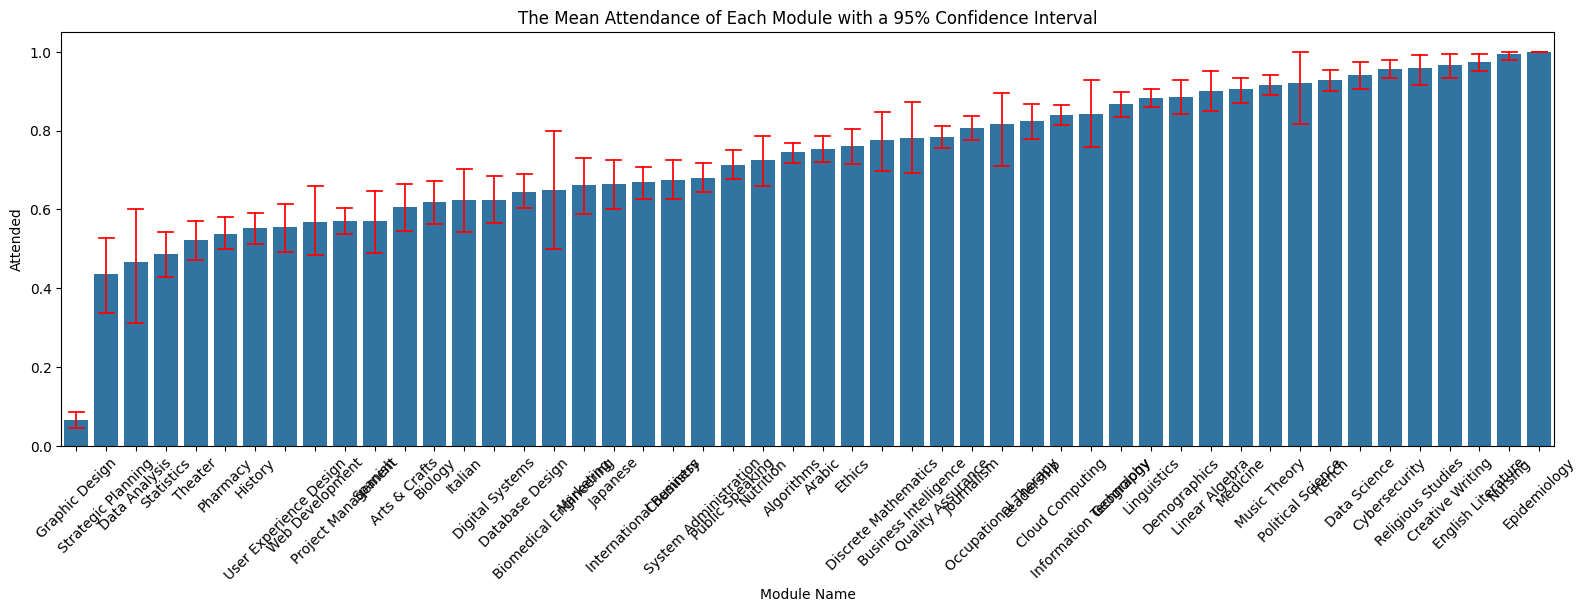

In [20]:
import seaborn as sns  
import scipy.stats as stats

the_attendance_is_mean = the_summative_df.groupby('Module Name')['Attended'].mean().sort_values()
order_of_the_module = the_attendance_is_mean.index

plt.figure(figsize=(16,6))
sns.barplot(data=the_summative_df, x='Module Name', y='Attended', errorbar=('ci',95), capsize=0.5, err_kws={'linewidth': 1.25, 'color' : 'red'}, order = order_of_the_module)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('The Mean Attendance of Each Module with a 95% Confidence Interval')
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    [Double click on this cell to edit and type your answer]

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [14]:
# your code here
...

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!